## Imports

In [ ]:
import tensorflow as tf 
from tensorflow import keras

## Models with the `Sequential` API

### A simple model for tabular datasets (4 features)

In [ ]:
num_features = 4
num_classes = 5

sequential_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(num_features,)),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
], name="sequential_model")

sequential_model.summary()

Model: "sequential_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


2022-09-12 10:20:02.549294: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


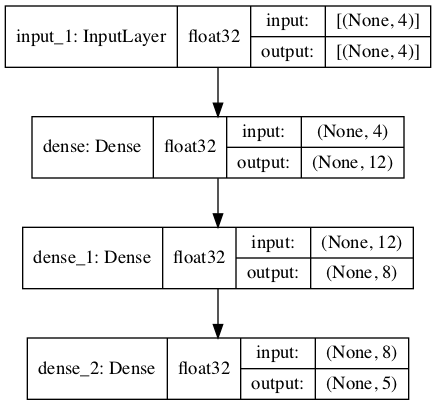

In [ ]:
keras.utils.plot_model(
    sequential_model, show_shapes=True, show_dtype=True,
)

### An image classification model with a MobileNetV2 backbone and a custom classification head

In [ ]:
mobilenet = keras.applications.MobileNetV2(weights="imagenet", include_top=False)
image_resolution = 224

custom_mobilenet_sequential = keras.Sequential(
    [
        keras.layers.InputLayer(
            input_shape=(image_resolution, image_resolution, 3), name="image"
        ),
        mobilenet,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ],
    name="custom_mobilenet_sequential",
)
custom_mobilenet_sequential.summary()

Model: "custom_mobilenet_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


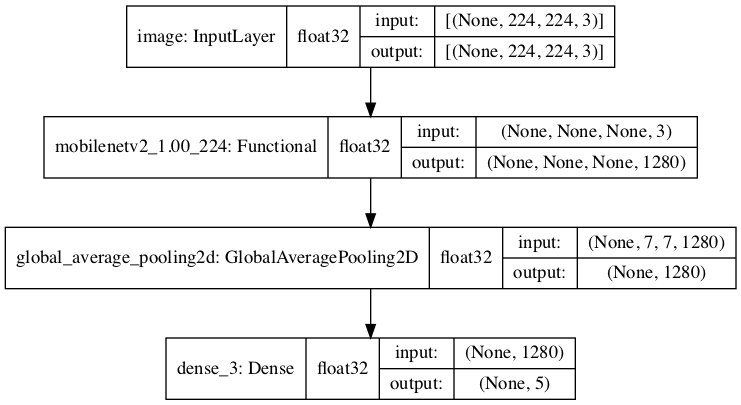

In [ ]:
keras.utils.plot_model(
    custom_mobilenet_sequential, show_shapes=True, show_dtype=True,
)

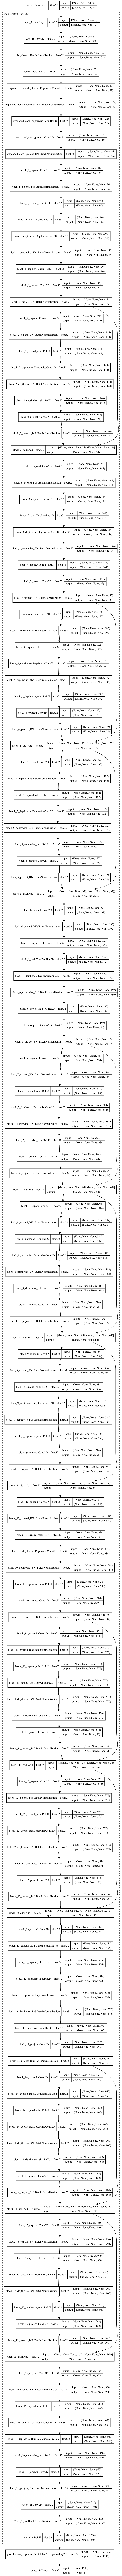

In [ ]:
keras.utils.plot_model(
    custom_mobilenet_sequential, show_shapes=True, show_dtype=True, expand_nested=True
)

### A text classification model

In [ ]:
embedding_dim = 128
input_dim = 512
lstm_units = 32

text_model_sequential = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None,), name="text"),
        keras.layers.Embedding(input_dim=input_dim, output_dim=embedding_dim),
        keras.layers.LSTM(units=lstm_units),
        keras.layers.Dense(num_classes, activation="softmax"),
    ],
    name="text_model_sequential",
)
text_model_sequential.summary()

Model: "text_model_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         65536     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 86,309
Trainable params: 86,309
Non-trainable params: 0
_________________________________________________________________


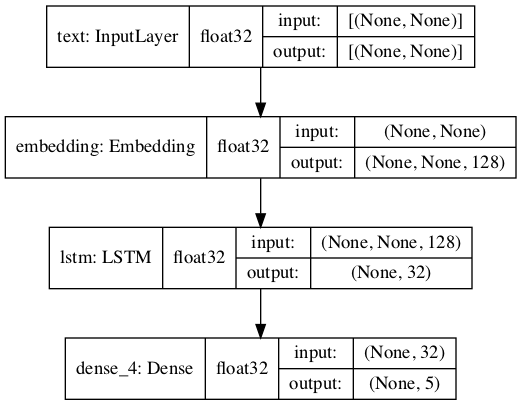

In [ ]:
keras.utils.plot_model(text_model_sequential, show_shapes=True, show_dtype=True)

### Access to model layers

In [ ]:
custom_mobilenet_sequential.layers

Notice that this model contains layers as well as another `keras.Model` which was constructed using the Functional API. This means we can actually expand the first layer of this model since it's a `keras.Model`. 

In [ ]:
custom_mobilenet_sequential.layers[0].summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

The text model, however, contains no additional `keras.Model`; just layers.

In [ ]:
text_model_sequential.layers

## Models with the `Functional` API

### Same tabular model but with the `Functional` API

In [ ]:
inputs = keras.Input((num_features,))
x = keras.layers.Dense(12, activation="relu")(inputs)
x = keras.layers.Dense(8, activation="relu")(x)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
functional_model_simple = keras.Model(inputs, outputs, name="functional_model")

functional_model_simple.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 45        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


We can notice the same model computation graph.

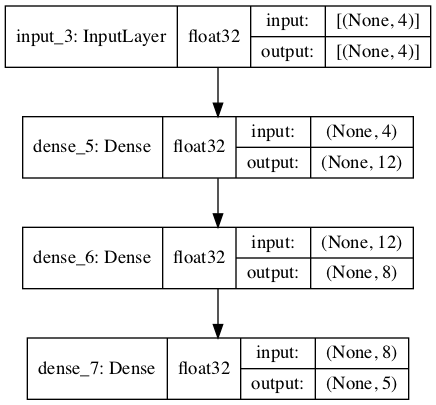

In [ ]:
keras.utils.plot_model(functional_model_simple, show_shapes=True, show_dtype=True)

### Models with a non-sequential topology

Now, we create a model where we don't have a sequential topology in the model computation graph. 

In [ ]:
inputs = keras.Input((num_features,))
x = keras.layers.Dense(12, activation="relu")(inputs)
x = keras.layers.Dense(8, activation="relu")(x)
concatenated_features = keras.layers.Concatenate()([x, inputs])
outputs = keras.layers.Dense(num_classes, activation="softmax")(concatenated_features)
functional_model = keras.Model(inputs, outputs, name="functional_model")

functional_model.summary()

Model: "functional_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 12)           60          input_4[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 8)            104         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 12)           0           dense_9[0][0]                    
                                                                 input_4[0][0]     

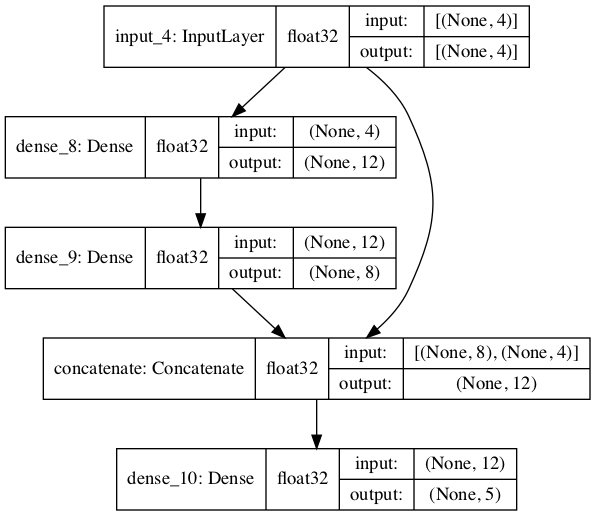

In [ ]:
keras.utils.plot_model(functional_model, show_shapes=True, show_dtype=True)

### A model with multiple outputs

In [ ]:
inputs = keras.Input((num_features,))
x1 = keras.layers.Dense(12, activation="relu")(inputs)
x2 = keras.layers.Dense(8, activation="relu")(x1)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x2)
functional_model_multi = keras.Model(
    inputs, outputs=[x1, x2, outputs], name="functional_model"
)

functional_model_multi.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_11 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 45        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


We won't observe any changes in the model computation graph.

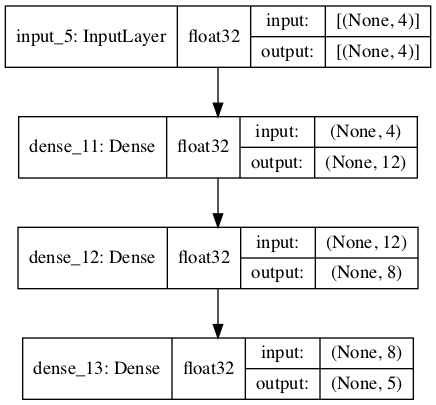

In [ ]:
keras.utils.plot_model(functional_model_multi, show_shapes=True, show_dtype=True)

We verify the multiple outputs of the model by calling it on a sample batch of data.

In [ ]:
batch_size = 16
random_inputs = tf.random.normal((batch_size, num_features))

outputs_simple = functional_model_simple(random_inputs)
outputs_multiple = functional_model_multi(random_inputs)

In [ ]:
outputs_simple.shape

TensorShape([16, 5])

In [ ]:
type(outputs_multiple)

list

In [ ]:
for i in range(len(outputs_multiple)):
    print(outputs_multiple[i].shape)

(16, 12)
(16, 8)
(16, 5)


### A model combining image + text inputs: A multimodal model

In [ ]:
projection_dim = 512

# Inputs
image_inputs = keras.Input((image_resolution, image_resolution, 3), name="image")
text_inputs = keras.Input((None,), name="text")

# Image representations
image_representations = mobilenet(image_inputs, training=False)
pooled_image_representations = keras.layers.GlobalAveragePooling2D()(
    image_representations
)
projected_image_representations = keras.layers.Dense(projection_dim, activation="relu")(
    pooled_image_representations
)

# Text representations
embedded_text = keras.layers.Embedding(input_dim=input_dim, output_dim=embedding_dim)(
    text_inputs
)
lstm_output = keras.layers.LSTM(units=lstm_units)(embedded_text)
projected_text_representations = keras.layers.Dense(projection_dim, activation="relu")(
    lstm_output
)

# Concatenate image and text representations
concatenated_projections = keras.layers.Concatenate()(
    [projected_image_representations, projected_text_representations]
)

# Classification top
outputs = keras.layers.Dense(num_classes, activation="softmax")(concatenated_projections)
multimodal_model = keras.Model([image_inputs, text_inputs], outputs, name="multimodal_model")

multimodal_model.summary()

Model: "multimodal_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
mobilenetv2_1.00_224 (Functiona (None, None, None, 1 2257984     image[0][0]                      
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 128)    65536       text[0][0]                       
___________________________________________________________________________________

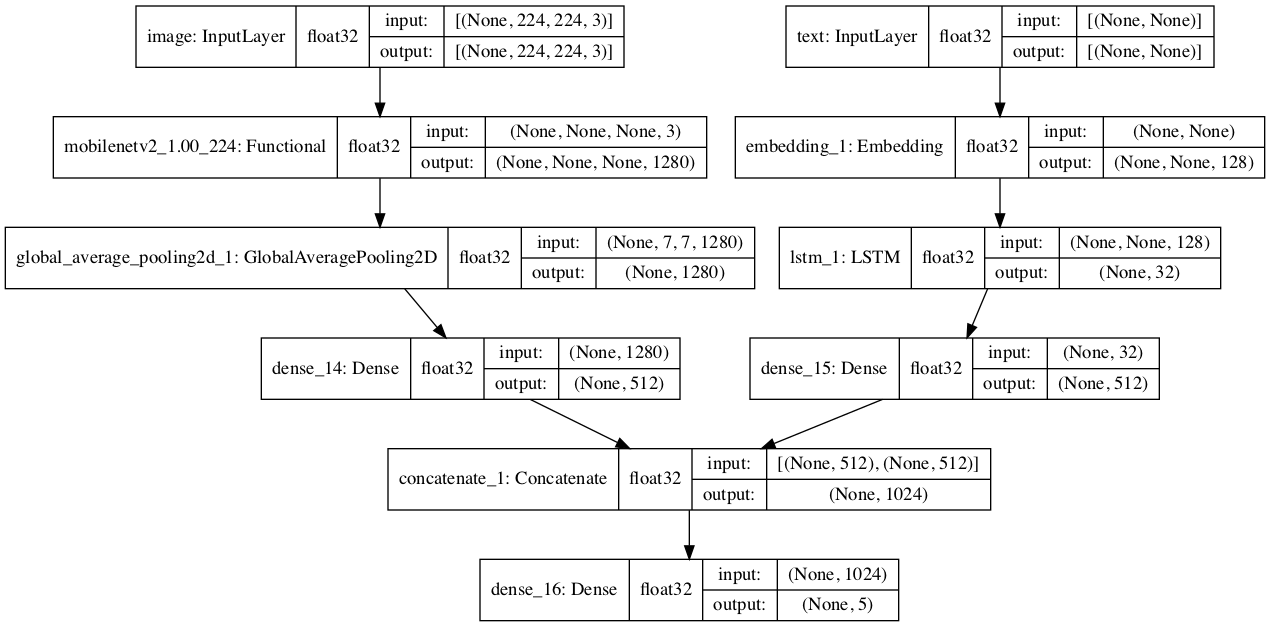

In [ ]:
keras.utils.plot_model(multimodal_model, show_shapes=True, show_dtype=True)

## Combining `Sequential` and `Functional`

In [ ]:
def sequential_image_model():
    return keras.Sequential(
        [mobilenet, keras.layers.GlobalAveragePooling2D(),],
        name="mobilenet_sequential",
    )

In [ ]:
def functional_text_model(text_inputs):
    embedded_text = keras.layers.Embedding(
        input_dim=input_dim, output_dim=embedding_dim
    )(text_inputs)
    
    lstm_output = keras.layers.LSTM(units=lstm_units)(embedded_text)
    
    return lstm_output

In [ ]:
# Inputs
image_inputs = keras.Input((image_resolution, image_resolution, 3), name="image")
text_inputs = keras.Input((None,), name="text")

# MobileNet model for images
image_model = sequential_image_model()

# Image representations
image_representations = image_model(image_inputs)
projected_image_representations = keras.layers.Dense(projection_dim, activation="relu")(
    image_representations
)

# Text representations
lstm_output = functional_text_model(text_inputs)
projected_text_representations = keras.layers.Dense(projection_dim, activation="relu")(
    lstm_output
)

# Concatenate image and text representations
concatenated_projections = keras.layers.Concatenate()(
    [projected_image_representations, projected_text_representations]
)

# Classification top
outputs = keras.layers.Dense(num_classes, activation="softmax")(concatenated_projections)
multimodal_model = keras.Model([image_inputs, text_inputs], outputs, name="multimodal_model")

multimodal_model.summary()

Model: "multimodal_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
image (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 128)    65536       text[0][0]                       
__________________________________________________________________________________________________
mobilenet_sequential (Sequentia (None, 1280)         2257984     image[0][0]                      
___________________________________________________________________________________

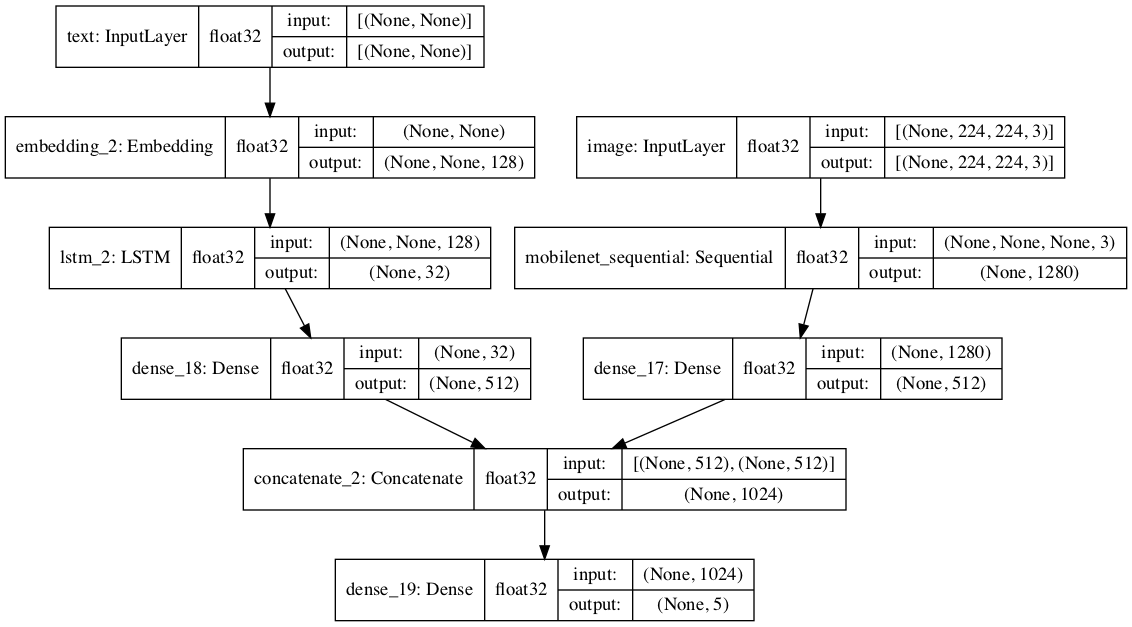

In [ ]:
keras.utils.plot_model(multimodal_model, show_shapes=True, show_dtype=True)

## Model subclassing

### Simple tabular model with subclassing

In [ ]:
class ShallowMLP(keras.Model):
    
    def __init__(self, num_classes=num_classes, **kwargs):
        super().__init__(**kwargs)
        self.dense1 = keras.layers.Dense(12, activation="relu")
        self.dense2 = keras.layers.Dense(8, activation="relu")
        self.classification_layer = keras.layers.Dense(
            num_classes, activation="softmax"
        )
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        outputs = self.classification_layer(x)
        return outputs

In [ ]:
shallow_mlp = ShallowMLP()
shallow_mlp(random_inputs).shape

TensorShape([16, 5])

In [ ]:
shallow_mlp.summary()

Model: "shallow_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             multiple                  60        
_________________________________________________________________
dense_21 (Dense)             multiple                  104       
_________________________________________________________________
dense_22 (Dense)             multiple                  45        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


If we don't call the initialized model on sample inputs then its params won't get initialized and calling `.summary()` on it will lead to an error.

In [ ]:
shallow_mlp = ShallowMLP(name="my_shallow_mlp")
shallow_mlp.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

First call the model on sample inputs and then we should be good. 

In [ ]:
_ = shallow_mlp(random_inputs)
shallow_mlp.summary()

Model: "my_shallow_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             multiple                  60        
_________________________________________________________________
dense_24 (Dense)             multiple                  104       
_________________________________________________________________
dense_25 (Dense)             multiple                  45        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


Notice that for subclassed models like above we don't have the **"Connected to"** parameter in the `summary()` outputs. We also don't have a concrete computational graph of the model.

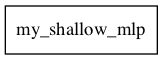

In [ ]:
keras.utils.plot_model(shallow_mlp, show_shapes=True, show_dtype=True)

### Customizing the training loop with subclassing

In [ ]:
# Taken from: https://keras.io/guides/customizing_what_happens_in_fit/

norm_tracker = keras.metrics.Mean(name="grad_norm_first_layer_weights")
loss_tracker = keras.metrics.Mean(name="loss")
accuracy_metric = keras.metrics.SparseCategoricalAccuracy(name="accuracy")


class Trainer(keras.Model):
    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [norm_tracker, loss_tracker]

    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            # Forward pass
            y_pred = self(x, training=True)

            # Compute loss
            loss = keras.losses.sparse_categorical_crossentropy(y, y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Compute gradient norm
        norm_tracker.update_state(tf.norm(gradients[0]))

        # Compute our own metrics
        loss_tracker.update_state(loss)
        accuracy_metric.update_state(y, y_pred)
        return {
            "loss": loss_tracker.result(),
            "accuracy": accuracy_metric.result(),
            "first_layer_weight_grad_norm": norm_tracker.result(),
        }

In [ ]:
inputs = keras.Input((num_features,))
x = keras.layers.Dense(12, activation="relu")(inputs)
x = keras.layers.Dense(8, activation="relu")(x)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

# Notice that we're using `Trainer` instead of `keras.Model`. 
functional_model_custom = Trainer(inputs, outputs, name="functional_model_custom")

# summary() still remains the same.
functional_model_custom.summary()

Model: "functional_model_custom"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_26 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 45        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


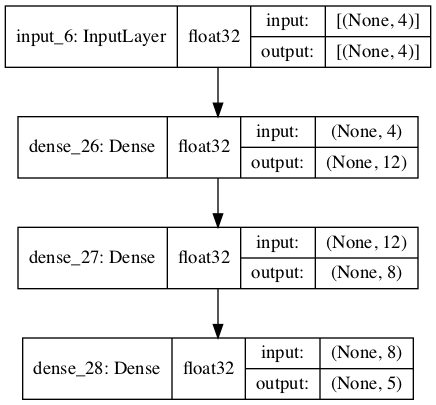

In [ ]:
# Regular computational graph.
keras.utils.plot_model(functional_model_custom, show_shapes=True, show_dtype=True)

The default training loop is what has changed now. We notice that the norm of the grads belonging to the first layer weights now gets logged.

In [ ]:
random_labels = tf.experimental.numpy.random.randint(
    0, 5, size=(random_inputs.shape[0],)
)

functional_model_custom.compile(optimizer="adam")

functional_model_custom.fit(random_inputs, random_labels, epochs=3)

2022-09-12 10:20:50.069967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
1/1 [==============================] - 0s 222ms/step - loss: 1.5824 - accuracy: 0.2500 - first_layer_weight_grad_norm: 4.4891
Epoch 2/3
1/1 [==============================] - 0s 3ms/step - loss: 1.5757 - accuracy: 0.2500 - first_layer_weight_grad_norm: 4.4810
Epoch 3/3
1/1 [==============================] - 0s 2ms/step - loss: 1.5691 - accuracy: 0.2500 - first_layer_weight_grad_norm: 4.4733


## References

* https://www.tensorflow.org/guide/intro_to_modules
* https://www.tensorflow.org/guide/keras/custom_layers_and_models
* https://keras.io/guides/customizing_what_happens_in_fit/